In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np

Mounted at /content/drive


# Etapa 1 - Paso 1

In [ ]:
clientes = pd.read_csv("LordVecchio/Julian-Vecchio---Comision-25262---TPI-Data-Analytics/entrega final - Julian Vecchio - C25262/datasets/clientes.csv")
marketing = pd.read_csv("LordVecchio/Julian-Vecchio---Comision-25262---TPI-Data-Analytics/entrega final - Julian Vecchio - C25262/datasets/marketing.csv")
ventas = pd.read_csv("LordVecchio/Julian-Vecchio---Comision-25262---TPI-Data-Analytics/entrega final - Julian Vecchio - C25262/datasets/ventas.csv")

In [3]:
ventas['fecha_venta'] = pd.to_datetime(ventas['fecha_venta'],format= '%d/%m/%Y')

In [4]:
ventas['precio'] = ventas['precio'].str.replace('$','').str.replace(',','.').astype(float)

In [5]:
ventas['ventas_totales'] = ventas['cantidad'] * ventas['precio']
ventas_mensuales = ventas.groupby(ventas['fecha_venta'].dt.to_period('M'))['ventas_totales'].sum()

In [6]:
ventas_mensuales

,ventas_totales
fecha_venta,
2024-01,129604.99
2024-02,118672.44
2024-03,136779.15
2024-04,144380.10
2024-05,143727.25
2024-06,108480.17
2024-07,116229.97
2024-08,119680.15
2024-09,115787.85


# Etapa 1 - Paso 2

In [7]:
print(f"VENTAS POR MES: \n {'-'*15}\n {ventas_mensuales}")

VENTAS POR MES: 
 ---------------
 fecha_venta
2024-01    129604.99
2024-02    118672.44
2024-03    136779.15
2024-04    144380.10
2024-05    143727.25
2024-06    108480.17
2024-07    116229.97
2024-08    119680.15
2024-09    115787.85
2024-10    112117.13
2024-11    119951.79
2024-12    117631.94
Freq: M, Name: ventas_totales, dtype: float64


# Etapa 1 - PASO 3

In [9]:
estructura = {}
for index,row in ventas.iterrows():
  estructura[row['id_venta']] = {
      'producto' : row['producto'],
      'precio_unitario' : row['precio'],
      'cantidad_vendida' : row['cantidad'],
      }


In [10]:
for valor in estructura.values():
  print(valor)

{'producto': 'Cuadro decorativo', 'precio_unitario': 69.94, 'cantidad_vendida': 5.0}
{'producto': 'Lámpara de mesa', 'precio_unitario': 105.1, 'cantidad_vendida': 5.0}
{'producto': 'Secadora', 'precio_unitario': 97.96, 'cantidad_vendida': 3.0}
{'producto': 'Heladera', 'precio_unitario': 114.35, 'cantidad_vendida': 8.0}
{'producto': 'Secadora', 'precio_unitario': 106.21, 'cantidad_vendida': 4.0}
{'producto': 'Horno eléctrico', 'precio_unitario': 35.35, 'cantidad_vendida': 9.0}
{'producto': 'Plancha de vapor', 'precio_unitario': 65.43, 'cantidad_vendida': 2.0}
{'producto': 'Proyector', 'precio_unitario': 88.17, 'cantidad_vendida': 9.0}
{'producto': 'Rincón de plantas', 'precio_unitario': 79.86, 'cantidad_vendida': 11.0}
{'producto': 'Candelabro', 'precio_unitario': 66.11, 'cantidad_vendida': 8.0}
{'producto': 'Aspiradora', 'precio_unitario': 95.9, 'cantidad_vendida': 5.0}
{'producto': 'Freidora eléctrica', 'precio_unitario': 111.18, 'cantidad_vendida': 1.0}
{'producto': 'Aspiradora', 'pr

# Etapa 1 - PASO 4

In [11]:
marketing.head()

,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024


In [12]:
clientes.head()

,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65


In [13]:
ventas.head()

,id_venta,producto,precio,cantidad,fecha_venta,categoria,ventas_totales
0,792,Cuadro decorativo,69.94,5.0,2024-01-02,Decoración,349.70
1,811,Lámpara de mesa,105.10,5.0,2024-01-02,Decoración,525.50
2,1156,Secadora,97.96,3.0,2024-01-02,Electrodomésticos,293.88
3,1372,Heladera,114.35,8.0,2024-01-02,Electrodomésticos,914.80
4,1546,Secadora,106.21,4.0,2024-01-02,Electrodomésticos,424.84


In [14]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_venta        3035 non-null   int64         
 1   producto        3035 non-null   object        
 2   precio          3033 non-null   float64       
 3   cantidad        3033 non-null   float64       
 4   fecha_venta     3035 non-null   datetime64[ns]
 5   categoria       3035 non-null   object        
 6   ventas_totales  3033 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 166.1+ KB


In [15]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_campanha   90 non-null     int64  
 1   producto      90 non-null     object 
 2   canal         90 non-null     object 
 3   costo         90 non-null     float64
 4   fecha_inicio  90 non-null     object 
 5   fecha_fin     90 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.3+ KB


In [16]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  567 non-null    int64  
 1   nombre      567 non-null    object 
 2   edad        567 non-null    int64  
 3   ciudad      567 non-null    object 
 4   ingresos    567 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 22.3+ KB


In [17]:
marketing.describe()

,id_campanha,costo
count,90.000000,90.000000
mean,45.500000,4.928667
std,26.124701,0.947750
min,1.000000,2.950000
25%,23.250000,4.372500
50%,45.500000,4.900000
75%,67.750000,5.562500
max,90.000000,7.390000


In [18]:
ventas.describe()

,id_venta,precio,cantidad,fecha_venta,ventas_totales
count,3035.000000,3033.000000,3033.000000,3035,3033.000000
mean,1499.851400,75.289034,6.496538,2024-06-25 20:51:09.785832192,488.968985
min,1.000000,26.000000,1.000000,2024-01-02 00:00:00,26.300000
25%,748.500000,50.020000,3.000000,2024-03-28 00:00:00,220.500000
50%,1502.000000,75.270000,7.000000,2024-06-21 00:00:00,418.050000
75%,2249.500000,100.040000,9.000000,2024-09-25 00:00:00,708.890000
max,3000.000000,124.970000,12.000000,2024-12-30 00:00:00,1488.120000
std,866.465379,28.734666,3.457250,NaN,334.594511


In [19]:
clientes.describe()

,id_cliente,edad,ingresos
count,567.000000,567.000000,567.000000
mean,284.000000,37.940035,34668.739012
std,163.823075,10.202885,12974.531446
min,1.000000,20.000000,170.290000
25%,142.500000,30.000000,26015.240000
50%,284.000000,37.000000,35066.830000
75%,425.500000,43.000000,42457.100000
max,567.000000,81.000000,88053.010000


# Etapa 1 - PASO 5

In [20]:
ventas.isnull().sum()

,0
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0
ventas_totales,2


In [21]:
marketing.isnull().sum()

,0
id_campanha,0
producto,0
canal,0
costo,0
fecha_inicio,0
fecha_fin,0


In [22]:
clientes.isnull().sum()

,0
id_cliente,0
nombre,0
edad,0
ciudad,0
ingresos,0


In [23]:
ventas.duplicated().sum()

np.int64(35)

In [24]:
marketing.duplicated().sum()

np.int64(0)

In [25]:
clientes.duplicated().sum()

np.int64(0)

# Etapa 2 - PASO 1

In [26]:
ventas.drop_duplicates(inplace=True)

In [27]:
ventas.dropna(inplace=True)

In [28]:
print(f"DUPLICADOS: {ventas.duplicated().sum()}\n")
print(f"NULOS: \n{ventas.isnull().sum()}")

DUPLICADOS: 0

NULOS: 
id_venta          0
producto          0
precio            0
cantidad          0
fecha_venta       0
categoria         0
ventas_totales    0
dtype: int64


# Etapa 2 - PASO 2

In [29]:
#Se seleccionan solamente los primeros 5 productos mas vendidos
ventas_producto = ventas.groupby(ventas['producto'])['ventas_totales'].sum().sort_values(ascending=False)
ventas_producto.head(5)

,ventas_totales
producto,
Lámpara de mesa,82276.38
Auriculares,74175.58
Microondas,72562.89
Cafetera,59607.31
Cuadro decorativo,54297.60


# Etapa 2 - PASO 3

In [30]:
#Se seleccionan solamente los primeros 5 productos mas vendidos
ventas_categoria = ventas.groupby(ventas['categoria'])['ventas_totales'].sum().sort_values(ascending=False)
ventas_categoria

,ventas_totales
categoria,
Electrodomésticos,505299.63
Electrónica,482577.80
Decoración,479216.09


# Etapa 2 - PASO 4

In [31]:
venta_mark = pd.merge(
    ventas,
    marketing,
    on='producto',
    how='outer'
    )
venta_mark.head()

,id_venta,producto,precio,cantidad,fecha_venta,categoria,ventas_totales,id_campanha,canal,costo,fecha_inicio,fecha_fin
0,630,Adorno de pared,71.99,9.0,2024-01-04,Decoración,647.91,74,TV,4.81,20/03/2024,03/05/2024
1,630,Adorno de pared,71.99,9.0,2024-01-04,Decoración,647.91,44,Email,5.08,13/04/2024,10/05/2024
2,630,Adorno de pared,71.99,9.0,2024-01-04,Decoración,647.91,14,RRSS,4.16,22/10/2024,21/12/2024
3,560,Adorno de pared,57.62,6.0,2024-01-07,Decoración,345.72,74,TV,4.81,20/03/2024,03/05/2024
4,560,Adorno de pared,57.62,6.0,2024-01-07,Decoración,345.72,44,Email,5.08,13/04/2024,10/05/2024


In [38]:
import pandas as pd
# Asumo que la columna 'ventas_totales' ya existe y es numérica.

# 1. Seleccionar las variables de interés
variables_analisis = ['precio', 'cantidad', 'ventas_totales']

# 2. Calcular las estadísticas descriptivas de una sola vez
# El método .describe() es una implementación altamente optimizada en C,
# por lo que tiene un costo computacional muy bajo O(N) para la mayoría de las métricas.
informe_estadistico = ventas[variables_analisis].describe().T
# .T (Transponer) se usa para que las métricas (count, mean, std, etc.) sean las columnas,
# lo que mejora la legibilidad para un informe.

print("## 📄 Informe de Estadística Descriptiva de Ventas\n")
print(informe_estadistico)

## 📄 Informe de Estadística Descriptiva de Ventas

                 count        mean         std   min     25%      50%  \
precio          2998.0   75.291318   28.736008  26.0   50.03   75.205   
cantidad        2998.0    6.502668    3.455107   1.0    3.00    7.000   
ventas_totales  2998.0  489.357412  334.281817  26.3  220.92  418.065   

                     75%      max  
precio          100.0675   124.97  
cantidad          9.0000    12.00  
ventas_totales  709.9200  1488.12  


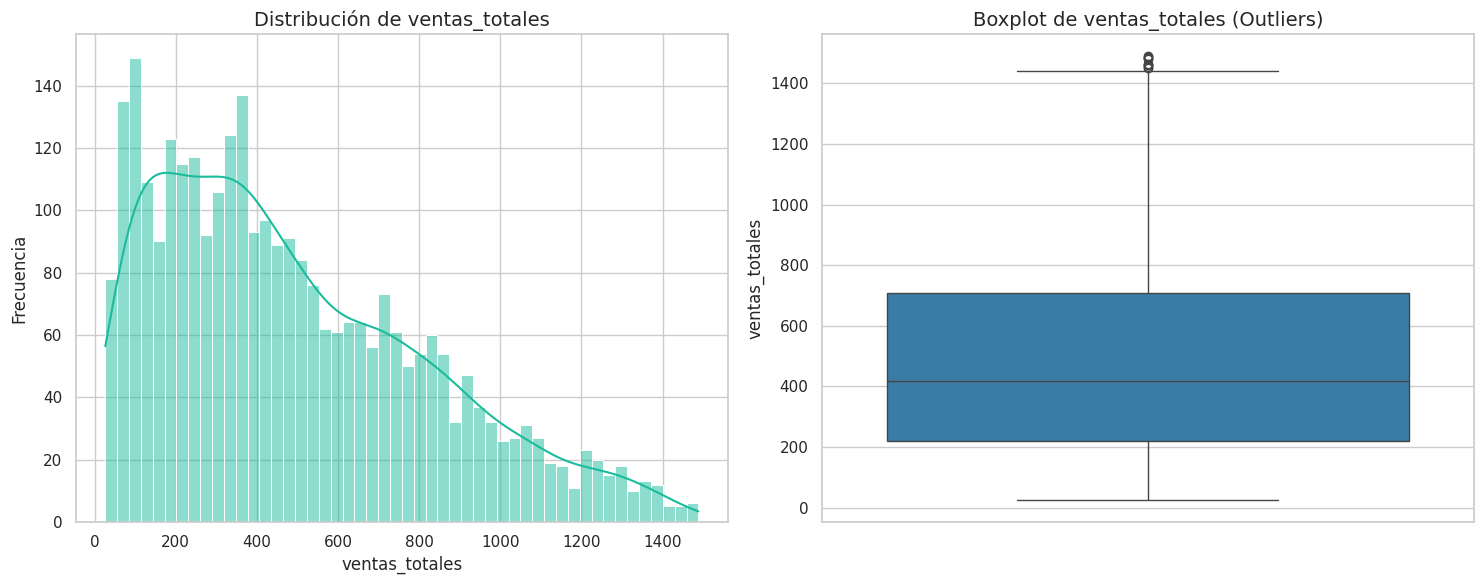

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid") # Mejorar la estética del gráfico

# Definir la variable a analizar para el ejemplo: 'ventas_totales'
variable_eda = 'ventas_totales'

plt.figure(figsize=(15, 6))

# 1. Histograma (para ver la forma de la distribución y el sesgo)
plt.subplot(1, 2, 1) # Crear un panel de 1 fila, 2 columnas, posición 1
sns.histplot(ventas[variable_eda], bins=50, kde=True, color="#1ABC9C")
plt.title(f'Distribución de {variable_eda}', fontsize=14)
plt.xlabel(variable_eda)
plt.ylabel('Frecuencia')

# 2. Diagrama de Caja (Boxplot) (para identificar outliers y simetría)
plt.subplot(1, 2, 2) # Posición 2
# Se aplica un filtro de IQR (Interquartile Range) si se quiere ver el cuerpo central de la distribución
# sin que los outliers extremos compriman demasiado el gráfico.
# Esto es una optimización de la visualización, no del cálculo.
sns.boxplot(y=ventas[variable_eda], color="#2980B9")
plt.title(f'Boxplot de {variable_eda} (Outliers)', fontsize=14)

plt.tight_layout()
plt.show()

In [40]:
# 1. Calcular la matriz de correlación para todas las variables numéricas
# Usamos el método de correlación de Pearson (el estándar)
correlacion_matriz = ventas[['precio', 'cantidad', 'ventas_totales']].corr()
print("\n## 📊 Matriz de Correlación de Pearson\n")
print(correlacion_matriz)


## 📊 Matriz de Correlación de Pearson

                  precio  cantidad  ventas_totales
precio          1.000000 -0.002388        0.558846
cantidad       -0.002388  1.000000        0.773009
ventas_totales  0.558846  0.773009        1.000000


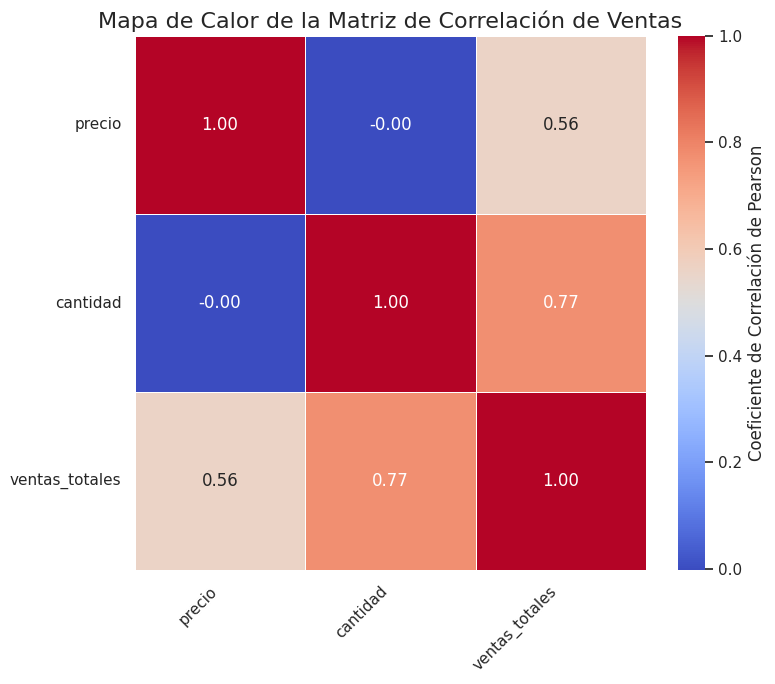

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calcular la Matriz de Correlación de Pearson
# Seleccionamos solo las variables numéricas que nos interesan para la correlación.
variables_correlacion = ['precio', 'cantidad', 'ventas_totales']
matriz_correlacion = ventas[variables_correlacion].corr(method='pearson')

# 2. Creación del Mapa de Calor (Heatmap)
plt.figure(figsize=(8, 7))

# sns.heatmap es la función más eficiente para visualizar matrices en Seaborn.
sns.heatmap(
    matriz_correlacion,
    annot=True,          # Mostrar el valor numérico (coeficiente de correlación) en cada celda
    fmt=".2f",           # Formato a dos decimales
    cmap='coolwarm',     # Paleta de colores divergente (ideal para correlaciones + y -)
    linewidths=.5,       # Líneas para separar las celdas
    cbar_kws={'label': 'Coeficiente de Correlación de Pearson'} # Etiqueta para la barra de color
)

plt.title('Mapa de Calor de la Matriz de Correlación de Ventas', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [42]:
# 1. Recalcular las métricas clave de negocio (Ventas y Clientes)
# Sumar las ventas totales por Categoría (Re-uso del resultado de Etapa 2)
resumen_categoria = ventas.groupby('categoria').agg(
    Total_Ventas_Monetarias=('ventas_totales', 'sum'),
    Total_Unidades_Vendidas=('cantidad', 'sum'),
    Precio_Promedio=('precio', 'mean')
).reset_index()

# 2. Consolidar la Información de Clientes (Asumo que 'clientes' está disponible)
# Contar el número de clientes por ciudad que tienen ingresos > 50000 (ejemplo de insight)
resumen_clientes = clientes[clientes['ingresos'] > 50000].groupby('ciudad').agg(
    Clientes_Alto_Valor=('id_cliente', 'count'),
    Ingreso_Promedio_Alto_Valor=('ingresos', 'mean')
).reset_index().sort_values(by='Clientes_Alto_Valor', ascending=False).head(5) # Top 5 ciudades

# 3. Presentación Final de Consolidación
print("\n## 📋 Consolidación Final: Resumen de Ventas por Categoría\n")
print(resumen_categoria)

print("\n## 🤝 Consolidación Final: Top 5 Ciudades con Clientes de Alto Valor\n")
print(resumen_clientes)

# Las variables 'resumen_categoria' y 'resumen_clientes' son el conjunto de datos final
# que resume los hallazgos clave (qué se vende y a quién se vende).


## 📋 Consolidación Final: Resumen de Ventas por Categoría

           categoria  Total_Ventas_Monetarias  Total_Unidades_Vendidas  \
0         Decoración                479216.09                   6490.0   
1  Electrodomésticos                505299.63                   6592.0   
2        Electrónica                482577.80                   6413.0   

   Precio_Promedio  
0         74.09800  
1         76.52096  
2         75.25492  

## 🤝 Consolidación Final: Top 5 Ciudades con Clientes de Alto Valor

                   ciudad  Clientes_Alto_Valor  Ingreso_Promedio_Alto_Valor
7             Resistencia                    8                  60735.16125
11               Santa Fe                    8                  58115.84750
4           Mar del Plata                    8                  55950.96750
10  San Miguel de Tucumán                    7                  56920.76000
6                 Posadas                    6                  54829.29500


# VENTAS POR MES

/tmp/ipython-input-2604120285.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ventas_mensuales = ventas.set_index('fecha_venta').resample('M')['ventas_totales'].sum().reset_index()


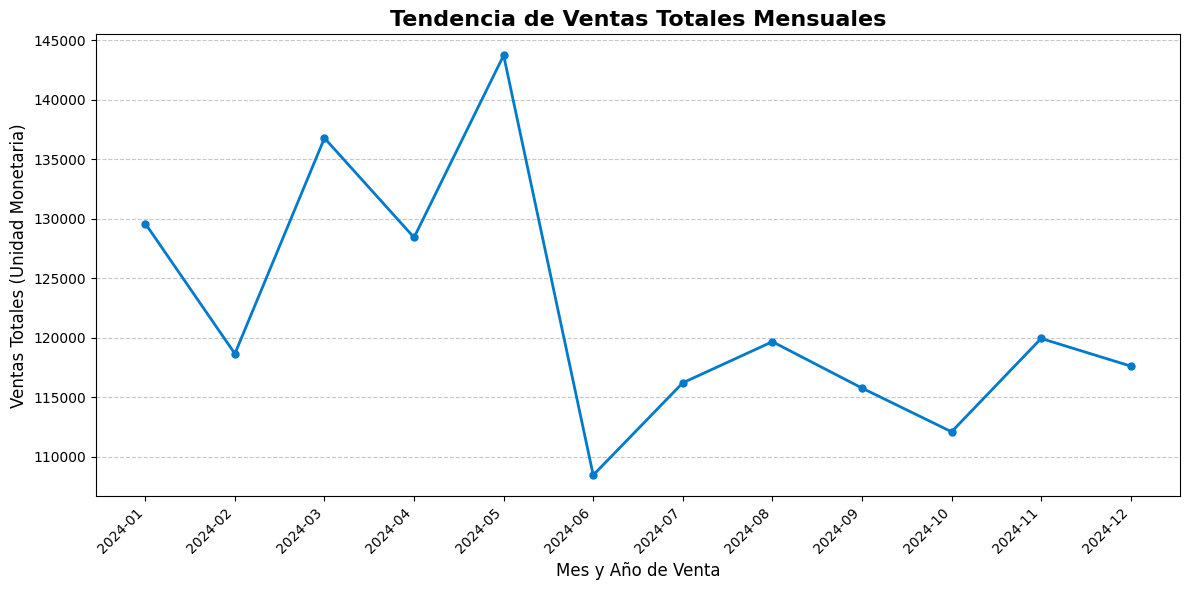

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Preparación de datos (Agrupación por Mes)

ventas_mensuales = ventas.set_index('fecha_venta').resample('M')['ventas_totales'].sum().reset_index()
ventas_mensuales['mes_anho'] = ventas_mensuales['fecha_venta'].dt.to_period('M')

# 2. Creación del Gráfico de Líneas
plt.figure(figsize=(12, 6))

# Usamos Matplotlib directamente para el trazado
plt.plot(ventas_mensuales['mes_anho'].astype(str), ventas_mensuales['ventas_totales'],
         marker='o', linestyle='-', color='#007ACC', linewidth=2, markersize=5) # Código de color optimizado

# Títulos y Etiquetas
plt.title('Tendencia de Ventas Totales Mensuales', fontsize=16, fontweight='bold')
plt.xlabel('Mes y Año de Venta', fontsize=12)
plt.ylabel('Ventas Totales (Unidad Monetaria)', fontsize=12)

# Rotar etiquetas para mejor legibilidad
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar la visualización
plt.show()

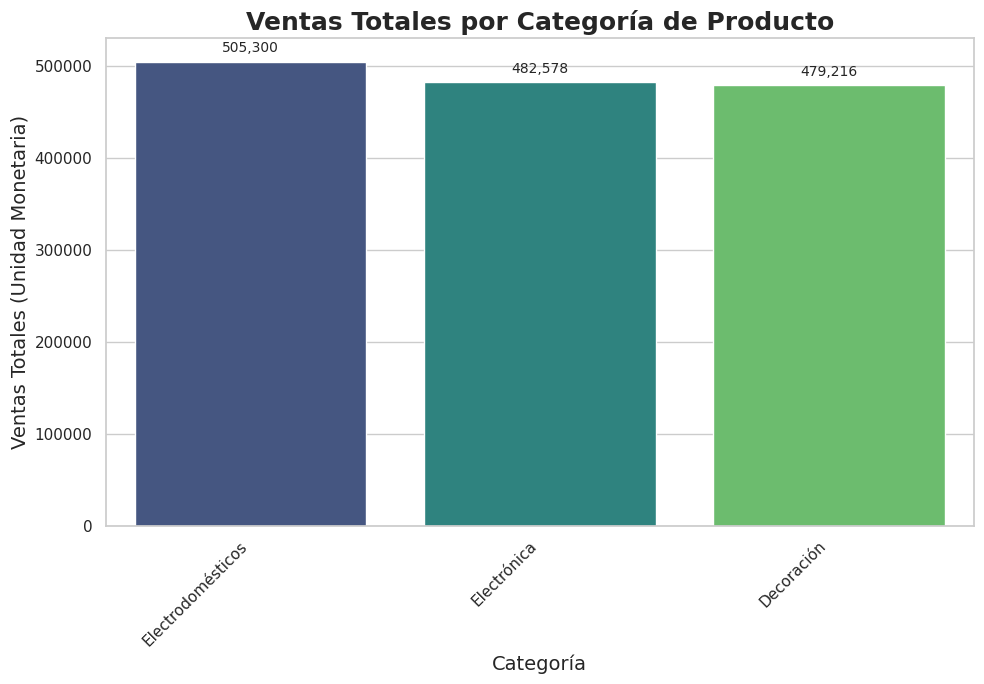

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Preparación de datos (Ya realizado en Etapa 3: ventas_categoria)
# ventas_categoria es una Serie de Pandas con 'categoria' como índice y la suma de 'ventas_totales' como valor.
df_categoria = ventas_categoria.rename('Ventas Totales').reset_index()

# 2. Creación del Gráfico de Barras Avanzado con Seaborn
sns.set_theme(style="whitegrid") # Aplicar un estilo limpio de Seaborn
plt.figure(figsize=(10, 7))

# Usamos sns.barplot para trazar, el cual es ideal para variables categóricas.
ax = sns.barplot(
    x='categoria',
    y='Ventas Totales',
    data=df_categoria,
    palette="viridis", # Paleta de colores avanzada y profesional
    hue='categoria', # Usar la categoría para diferenciar el color
    legend=False
)

# Títulos y Etiquetas
plt.title('Ventas Totales por Categoría de Producto', fontsize=18, fontweight='bold')
plt.xlabel('Categoría', fontsize=14)
plt.ylabel('Ventas Totales (Unidad Monetaria)', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Añadir etiquetas de valor a las barras (Mejora de la presentación)
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=10)

plt.tight_layout()
plt.show()

In [35]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Asumiendo que 'ventas_mensuales' y 'df_producto_analisis' están preparados.

# 1. Crear la estructura de subplots (1 fila, 2 columnas)
# O mejor aún, 2 filas y 1 columna para un diseño vertical más limpio y tipo "dashboard".
fig = make_subplots(
    rows=2,
    cols=1,
    shared_xaxes=False, # No compartir ejes X ya que son datos distintos (Tiempo vs Costo)
    subplot_titles=("Tendencia de Ventas Mensuales", "Costo de Marketing vs. Ventas por Producto"),
    vertical_spacing=0.15 # Espacio entre gráficos para mayor claridad
)

# --- 2. Gráfico Superior: Tendencia de Ventas (Líneas) ---
# Usamos go.Scatter para el gráfico de líneas de Plotly
fig.add_trace(
    go.Scatter(
        x=ventas_mensuales['mes_anho'].astype(str),
        y=ventas_mensuales['ventas_totales'],
        mode='lines+markers',
        name='Ventas Mensuales',
        line=dict(color='#3283FE', width=3) # Color para la línea
    ),
    row=1, col=1 # Posición: Fila 1, Columna 1
)

# --- 3. Gráfico Inferior: Correlación de Marketing (Dispersión) ---
# Usamos go.Scatter para el gráfico de dispersión, agregando interactividad de color y tamaño
fig.add_trace(
    go.Scatter(
        x=df_producto_analisis['costo_marketing'],
        y=df_producto_analisis['ventas_totales'],
        mode='markers',
        name='Productos',
        marker=dict(
            size=df_producto_analisis['ventas_totales'] / df_producto_analisis['ventas_totales'].mean() * 15, # Tamaño proporcional a las ventas
            color=df_producto_analisis['costo_marketing'], # Color basado en el costo
            colorscale='Viridis', # Escala de color
            showscale=True,
            colorbar=dict(title='Costo Marketing'),
            sizemode='diameter'
        ),
        text=df_producto_analisis['producto'], # Tooltip interactivo con nombre del producto
        hovertemplate='Producto: %{text}<br>Costo: %{x:$,.0f}<br>Ventas: %{y:$,.0f}<extra></extra>'
    ),
    row=2, col=1 # Posición: Fila 2, Columna 1
)

# --- 4. Configuración Global de Layout ---
fig.update_layout(
    height=800, # Altura total de la figura
    title_text="Dashboard Interactivo: Tendencia y Efectividad de Ventas",
    hovermode="x unified", # Mejorar la interactividad del hover
    font=dict(family="Arial", size=10),
    # Configuración de ejes
    xaxis1=dict(title='Mes', showgrid=True),
    yaxis1=dict(title='Ventas Totales ($)', showgrid=True),
    xaxis2=dict(title='Costo Total de Marketing ($)', showgrid=True),
    yaxis2=dict(title='Ventas Totales ($)', showgrid=True)
)

fig.show()